## Chapter 8

### Algorithm Examples

In [4]:
from importlib import reload
#import utilities as utils
#reload(utils)
import sys
sys.path.append("..")
from common import multivariate_student
reload(multivariate_student)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import stats
import scipy.special as scipy_spec

### Problem 1

The conditional density for the discriminative model is

\begin{eqnarray}
Pr(w \ | \ \mathbf{X} ) &=& \text{Beta}_{w} [\alpha, \alpha] \\
&=& \frac{\Gamma[2 \alpha]}{\Gamma[\alpha]^2} w^{\alpha-1}(1-w)^{\alpha-1}, 
\end{eqnarray}

where the given constraint $\alpha=\beta$ has been used.

The parameter $\alpha \in \mathbb{R}^+$ is said to depend on the data, so one approach would be to setup a linear mapping from $\mathbb{R}^D$ to $\mathbb{R}^+$ as

\begin{eqnarray}
\alpha = \frac{1}{I} \sum_{i=1}^I f(\mathbf{\phi}^T \mathbf{x'}_i)
\end{eqnarray}

where $\mathbf{x'}$ includes the constant 1 in the first position to allow training the bias term $\phi_0$.  The continuously differentiable function $f$ is chosen so that $\alpha$ can be enforced to be positive.  One option for $f$ would be a superposition of radial basis functions.

Next, find the log-likelihood; this will provide the objective function to be maximized.  Assuming the datapoints are independent, it follows that:

\begin{eqnarray}
\log L &=& \sum_{i=1}^I I \log \Gamma [2 \alpha ] - 2 I \log \Gamma [ \alpha ] + (\alpha-1) \sum_{i=1}^I \bigl ( \log w_i + \log [1 - w_i ] \bigr ) 
\end{eqnarray}

Now, the model for $\alpha$ can be plugged in to the log-likelihood and the resulting equation can be differentiated with respect to the $\phi_k$'s, with $k \in {0, \dots, D}$.  The maximum likelihood will occur where all derivatives vanish.

### Problem 2
Start with the conditional probability density:
\begin{eqnarray}
Pr(\mathbf{w} \ | \ \mathbf{X}) &=& \text{Stud}_\mathbf{w} \bigl [ \mathbf{X}^T \mathbf{\phi}, \sigma^2 I , \nu \bigr ]
\end{eqnarray}

and take the log-likelihood:

\begin{eqnarray}
\log L &=& \log \Gamma \Bigl [ \frac{\nu + D + 1}{2} \Bigr ] - \frac{D+1}{2} \log [\nu \pi] - \frac{1}{2} \log | \Sigma| - \log \Gamma \bigl [ \frac{\nu}{2} \bigr ] - \frac{\nu + D + 1}{2} \log \Bigl [ 1 + \frac{(\mathbf{w} - \mathbf{X}^T \mathbf{\phi})^T(\mathbf{w} - \mathbf{X}^T \mathbf{\phi})}{\sigma^2 \nu} \Bigr ]
\end{eqnarray}

_Note: the $D+1$-term comes from the inclusion of "1" to the data vector so that the bias-term can be learned.  This element increases the size of the data vectors by 1._

Now, the usual steps for maximum likelihood learning follow:  _take the derivatives and solve for the parameter values that make the derivatives vanish_.

### Problem 3

\begin{eqnarray}
\log L &=& -\frac{I}{2} \log [2 \pi] - \frac{I}{2} \log \sigma^2 - \frac{(\mathbf{w} - \mathbf{X}^T \mathbf{\phi})^T(\mathbf{w} - \mathbf{X}^T \mathbf{\phi})}{2 \sigma^2}
\end{eqnarray}

Take the derivative w.r.t $\mathbf{\phi}$:

\begin{eqnarray}
0 &=& \frac{\partial (\log L)}{\partial \mathbf{\phi}} \\
&=& \frac{1}{2 \sigma^2} \bigl [ -\mathbf{X}(\mathbf{w} - \mathbf{X}^T \mathbf{\phi}) -\mathbf{X}(\mathbf{w} - \mathbf{X}^T \mathbf{\phi}) \bigr ] \\
&=& -\frac{1}{\sigma^2} \bigl [ \mathbf{X}(\mathbf{w} - \mathbf{X}^T \mathbf{\phi}) \bigr ] \\
0 &=& \mathbf{X} \mathbf{w} - \mathbf{X} \mathbf{X}^T \mathbf{\phi} \\
\mathbf{X} \mathbf{X}^T \mathbf{\phi} &=& \mathbf{X} \mathbf{w} \\
\mathbf{\phi} &=& \bigl ( \mathbf{X} \mathbf{X}^T \bigr )^{-1} \mathbf{X} \mathbf{w}
\end{eqnarray}

### Problem 4

\begin{eqnarray}
Pr(\mathbf{\phi} \ | \ \mathbf{X}, \mathbf{w}) &=& \frac{Pr(\mathbf{w} \ | \ \mathbf{X}, \mathbf{\phi}) Pr(\mathbf{\phi})}{Pr(\mathbf{w} \ | \ \mathbf{X})} \\
&=& \frac{\text{Norm}_{\mathbf{w}} \bigl [ \mathbf{X}^T \mathbf{\phi}, \sigma^2 I \bigr ] \text{Norm}_{\mathbf{\phi}} \bigl [ \mathbf{0}, \sigma_p^2 I \bigr ]}{Pr(\mathbf{w} \ | \ \mathbf{X})}
\end{eqnarray}

See Eqn. 5.18:

\begin{eqnarray}
\text{Norm}_{\mathbf{w}} \bigl [ \mathbf{X}^T \mathbf{\phi}, \sigma^2 I \bigr ] &=& \kappa \text{Norm}_{\mathbf{\phi}} \Bigl [ \frac{1}{\sigma^2} \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T \Bigr )^{-1} \mathbf{X} \mathbf{w}, \frac{1}{\sigma^2} \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T \Bigr )^{-1} \Bigr ] \\
&=& \kappa \text{Norm}_{\mathbf{\phi}} \bigl [ (\mathbf{X} \mathbf{X}^T)^{-1} \mathbf{X} \mathbf{w}, \sigma^2 ( \mathbf{X} \mathbf{X}^T)^{-1} \bigr ]
\end{eqnarray}

Combine with original Bayes' formulation:

\begin{eqnarray}
\frac{\text{Norm}_{\mathbf{w}} \bigl [ \mathbf{X}^T \mathbf{\phi}, \sigma^2 I \bigr ] \text{Norm}_{\mathbf{\phi}} \bigl [ \mathbf{0}, \sigma_p^2 I \bigr ]}{Pr(\mathbf{w} \ | \ \mathbf{X})} &=& \frac{\kappa \text{Norm}_{\mathbf{\phi}} \bigl [ (\mathbf{X} \mathbf{X}^T)^{-1} \mathbf{X} \mathbf{w}, \sigma^2 ( \mathbf{X} \mathbf{X}^T)^{-1} \bigr ] \text{Norm}_{\mathbf{\phi}} \bigl [ \mathbf{0}, \sigma_p^2 I \bigr ]}{Pr(\mathbf{w} \ | \ \mathbf{X})}
\end{eqnarray}

Use Eqn. 5.14 to combine:

\begin{eqnarray}
\frac{\kappa \text{Norm}_{\mathbf{\phi}} \bigl [ (\mathbf{X} \mathbf{X}^T)^{-1} \mathbf{X} \mathbf{w}, \sigma^2 ( \mathbf{X} \mathbf{X}^T)^{-1} \bigr ] \text{Norm}_{\mathbf{\phi}} \bigl [ \mathbf{0}, \sigma_p^2 I \bigr ]}{Pr(\mathbf{w} \ | \ \mathbf{X})} &=& \frac{\bar \kappa}{Pr(\mathbf{w} \ | \ \mathbf{X})} \text{Norm}_{\mathbf{\phi}} \Bigl [ \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I \Bigr )^{-1} \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T  \bigl ( \mathbf{X} \mathbf{X}^T \bigr )^{-1} \mathbf{X} \mathbf{w}, \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I \Bigr )^{-1} \Bigr ] \\
&=& \frac{\bar \kappa}{Pr(\mathbf{w} \ | \ \mathbf{X})} \text{Norm}_{\mathbf{\phi}} \Bigl [ \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I \Bigr )^{-1} \frac{1}{\sigma^2} \mathbf{X} \mathbf{w}, \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I \Bigr )^{-1} \Bigr ]
\end{eqnarray}

where $\bar \kappa$ combines constants from application of Eqns. 5.18 and 5.14.  The constant $\frac{\bar \kappa}{Pr(\mathbf{w} \ | \ \mathbf{X})}$ must be equal to 1 in order for the expression to be a valid probability distribution.  Now, the desired form is found:

\begin{eqnarray}
Pr(\mathbf{\phi} \ | \ \mathbf{X}, \mathbf{w}) &=& \text{Norm}_{\mathbf{\phi}} \Bigl [ \frac{1}{\sigma^2} A^{-1} \mathbf{X} \mathbf{w}, A^{-1} \Bigr ] \\
A &=& \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I
\end{eqnarray}

### Problem 5

As mentioned in the solutions manual, tackling this problem directly would be a pain.  Instead, consider the following for a new datapoint:

\begin{eqnarray}
w^* &=& \mathbf{x^*}^T \mathbf{\phi} + \varepsilon, \ \varepsilon \sim \text{Norm}_h [ 0, \sigma^2] \\
\mathbf{\phi} &=& \frac{1}{\sigma^2} A^{-1} \mathbf{X} \mathbf{w} + \mathbf{\alpha}, \ \mathbf{\alpha} \sim \text{Norm}_\mathbf{h} [\mathbf{0}, \mathbf{A}^{-1}] \\
A &=& \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I
\end{eqnarray}

The $h$ and $\mathbf{h}$ are hidden variables that are used for the random perturbations of the world state $w^*$ and the weight vector $\phi$, respectively.  Take a look at Eqn. 8.12 if the form above looks strange; the results above are a simple consequence of the form of the probability distributions inside the integral on the second line.  Now, to show that $w^*$ is, in fact, drawn from the desired distribution, look at expectations (taken w.r.t the hidden variables):

\begin{eqnarray}
E[ w^* ] &=& \mathbf{x^*}^T E [ \mathbf{\phi}] + E[\varepsilon] \\
&=& \frac{1}{\sigma^2} \mathbf{x^*}^T A^{-1} \mathbf{X} \mathbf{w} + 0 \\
&=& \frac{1}{\sigma^2} \mathbf{x^*}^T A^{-1} \mathbf{X} \mathbf{w} \\
&\triangleq& \mu_{w^*} \\
E[(w^*)^2] &=& \mathbf{x^*}^T E [ \mathbf{\phi} \mathbf{\phi}^T ] \mathbf{x^*} + E [\varepsilon^2 ] \\
&=& \mathbf{x^*}^T E [ \mathbf{\phi} \mathbf{\phi}^T ] \mathbf{x^*} + \sigma^2
\end{eqnarray}

since $\varepsilon = \varepsilon - E[\varepsilon]$.  _Note: the desired relationship for the mean has already been found above._

Now, for $E [ \mathbf{\phi} \mathbf{\phi}^T ]$, note that (see Ch. 3):
\begin{eqnarray}
E[(\mathbf{\phi} - E[\mathbf{\phi}])(\mathbf{\phi} - E[\mathbf{\phi}])^T] &=& E [ \mathbf{\phi} \mathbf{\phi}^T ] - E [ \mathbf{\phi} ] E [ \mathbf{\phi}^T] \\
(\implies) A^{-1} &=& E [ \mathbf{\phi} \mathbf{\phi}^T ] - \frac{1}{\sigma^4} A^{-1} \mathbf{X} \mathbf{w} \mathbf{w}^T \mathbf{X}^T A^{-1} \\
E [ \mathbf{\phi} \mathbf{\phi}^T ] &=& A^{-1} + \frac{1}{\sigma^4} A^{-1} \mathbf{X} \mathbf{w} \mathbf{w}^T \mathbf{X}^T A^{-1}
\end{eqnarray}

Putting all of this information together, we have:

\begin{eqnarray}
E[(w^*-E[w^*])^2] &=& E[(w^*)^2] - E[w^*]^2 \\
&=& \mathbf{x^*}^T \Bigl ( A^{-1} + \frac{1}{\sigma^4} A^{-1} \mathbf{X} \mathbf{w} \mathbf{w}^T \mathbf{X}^T A^{-1} \Bigr ) \mathbf{x^*} + \sigma^2 - \frac{1}{\sigma^4} \mathbf{x^*}^T A^{-1} \mathbf{X} \mathbf{w} \mathbf{w}^T \mathbf{X}^T A^{-1} \mathbf{x^*} \\
&=& \mathbf{x^*}^T A^{-1} \mathbf{x^*} + \sigma^2 \\
&\triangleq& \Sigma_{w^*}
\end{eqnarray}

Therefore, we have shown the desired relationship $w^* \sim \text{Norm}[ \mu_{w^*}, \Sigma_{w^*} ]$ with:

\begin{eqnarray}
\mu_{w^*} &\triangleq& \frac{1}{\sigma^2} \mathbf{x^*}^T A^{-1} \mathbf{X} \mathbf{w} \\
\Sigma_{w^*} &\triangleq& \mathbf{x^*}^T A^{-1} \mathbf{x^*} + \sigma^2
\end{eqnarray}

### Problem 6

The inversion lemma states for matrices $B, C, D$ (with appropriate size):

\begin{eqnarray}
(B^{-1} + C^T D^{-1} C)^{-1} = B - B C^T(C B C^T + D)^{-1} C B
\end{eqnarray}

The problem at-hand can be put into the desired form above by setting:

\begin{eqnarray}
B &=& \sigma_p^2 I_D \\
C &=& \mathbf{X}^T \\
D &=& \sigma^2 I
\end{eqnarray}

The inversion lemma is used to show:

\begin{eqnarray}
A^{-1} &=& \Bigl ( \frac{1}{\sigma^2} \mathbf{X} \mathbf{X}^T + \frac{1}{\sigma_p^2} I_D \Bigr )^{-1} \\
&=& \sigma_p^2 I_D - \sigma_p^2 I_D \mathbf{X} (\mathbf{X}^T \sigma_p^2 I_D \mathbf{X} + \sigma^2 I_I)^{-1} \mathbf{X}^T \sigma_p^2 I_D \\
&=& \sigma_p^2 I_D - \sigma_p^4 \frac{1}{\sigma_p^2} I_D \mathbf{X} \Bigl ( \mathbf{X} \mathbf{X}^T + \frac{\sigma^2}{\sigma_p^2} I_I \Bigr )^{-1} \mathbf{X}^T \\
&=& \sigma_p^2 I_D - \sigma_p^2 I_D \mathbf{X} \Bigl ( \mathbf{X} \mathbf{X}^T + \frac{\sigma^2}{\sigma_p^2} I_I \Bigr )^{-1} \mathbf{X}^T
\end{eqnarray}

### Problem 7

\begin{eqnarray}
Pr( \mathbf{w} \ | \ \mathbf{X}, \sigma^2) &=& \text{Norm}_\mathbf{w} [\mathbf{0}, \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I] \\
&=& \frac{1}{(2 \pi)^{D/2} | \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |^{1/2} } \exp [ -0.5 \mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \mathbf{w} ]
\end{eqnarray}

Take the derivative w.r.t $\sigma^2$ next.  _Note: the following relationships from the appendix are useful for the derivation_ ($x$ is a scalar, $Y$ is a matrix):

\begin{eqnarray}
\frac{\partial | Y |}{\partial x} &=& |Y| \text{Tr} \biggl [Y^{-1} \frac{\partial Y}{\partial x} \biggr ] \\
\frac{\partial Y^{-1}}{\partial x} &=& -Y^{-1} \frac{\partial Y}{\partial x} Y^{-1}
\end{eqnarray}

Use these facts, along with the product and chain rules of differentiation:

\begin{eqnarray}
\frac{\partial Pr( \mathbf{w} \ | \ \mathbf{X}, \sigma^2)}{\partial \sigma^2} &=& \frac{\exp [ -0.5 \mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \mathbf{w} ]}{(2 \pi)^{D/2}} \Bigl (-\frac{| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I | \cdot \text{Tr} [(\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} I ] }{2| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |^{3/2}}  \\
&+& \frac{(-0.5 \mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \mathbf{w}) \cdot (-0.5 \mathbf{w}^T \bigl [ -(\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} I (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \bigr ] \mathbf{w})}{| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |^{1/2}} \Bigr ) \\
&=& \frac{\exp [ -0.5 \mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \mathbf{w} ]}{(2 \pi)^{D/2}} \Bigl (-\frac{\text{sgn}(| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |) \cdot \text{Tr} [(\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} I ] }{2| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |^{1/2}} \\
&-& \frac{0.25 (\mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-1} \mathbf{w}) \cdot (\mathbf{w}^T (\sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I)^{-2} \mathbf{w})}{| \sigma_p^2 \mathbf{X} \mathbf{X}^T + \sigma^2 I |^{1/2}} \Bigr )
\end{eqnarray}

### Problem 8

\begin{eqnarray}
q(\phi) &=& \max_h \Bigl ( \text{Norm}_\phi \bigl [ 0, \frac{1}{h} \bigr ] \cdot \text{Gam}_h \bigl [ \frac{\nu}{2}, \frac{\nu}{2} \bigr ] \Bigr ) \\
&=& \max_h \Bigl ( \frac{h}{\sqrt{2 \pi}} \exp[-\phi^2 h] \frac{\nu^{\nu/2}}{2^{\nu/2} \Gamma \bigl [ \frac{\nu}{2} \bigr ]} h^{\nu/2 - 1} \exp \bigl [ -\frac{\nu h}{2} \bigr ] \Bigr ) \\
&=& \frac{\nu^{\nu/2}}{2^{(\nu+1)/2} \pi^{1/2} \Gamma \bigl [ \frac{\nu}{2} \bigr ]} \max_h \Bigl [ h^{(\nu+1)/2} \exp \bigl [ -\bigl ( \phi^2 + \frac{\nu}{2} \bigr ) h \bigr ] \Bigr ]
\end{eqnarray}

To actually find the argmax, $\hat h$, differentiate w.r.t $h$ and set the result $=0$:

\begin{eqnarray}
0 &=& \frac{\partial q(\phi)}{\partial h} = \frac{\nu^{\nu/2}}{2^{(\nu+1)/2} \pi^{1/2} \Gamma \bigl [ \frac{\nu}{2} \bigr ]} \biggl [ \frac{\nu + 1}{2} {\hat h}^{(\nu-1)/2} \exp \bigl [ -\bigl ( \phi^2 + \frac{\nu}{2} \bigr ) \hat h \bigr ] - {\hat h}^{(\nu+1)/2} \bigl ( \phi^2 + \frac{\nu}{2} \bigr ) \exp \bigl [ -\bigl ( \phi^2 + \frac{\nu}{2} \bigr ) \hat h \bigr ] \biggr ] \\
(\implies) \ \ 0 &=& \frac{\nu+1}{2} - \hat h \bigl ( \phi^2 + \frac{\nu}{2} \bigr ) \\
\hat h &=& \frac{\nu+1}{2 \bigl ( \phi^2 + \frac{\nu}{2} \bigr )}
\end{eqnarray}

The closed-form expression is then:

\begin{eqnarray}
q(\phi) &=& \frac{\nu^{\nu/2}}{2^{(\nu+1)/2} \pi^{1/2} \Gamma \bigl [ \frac{\nu}{2} \bigr ]} \Bigl ( \frac{\nu+1}{2 \bigl ( \phi^2 + \frac{\nu}{2} \bigr )} \Bigr )^{(\nu+1)/2} \exp \bigl [- (\nu + 1)/2 \bigr ]
\end{eqnarray}

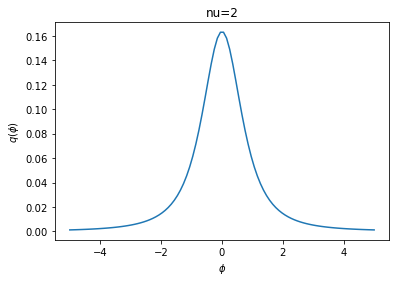

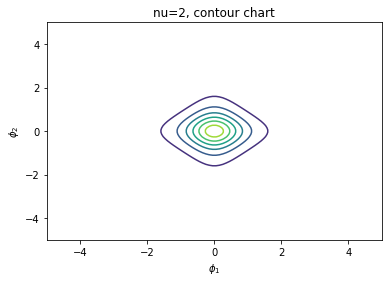

In [14]:
def q(phi, nu):
    _const = np.exp(-0.5*(nu+1)) * nu**(0.5*nu) / (2.**(0.5*(nu+1))*np.sqrt(np.pi)*scipy_spec.gamma(0.5*nu))
    _base = 0.5 * (nu + 1.) / (phi**2 + 0.5*nu)
    return _const * _base**(0.5 * (nu + 1))

nu = 2.
phis = np.linspace(-5, 5, 100)
qs = np.array([q(_phi, nu) for _phi in phis])

# single-dimensional case
plt.figure()
plt.plot(phis, qs)
plt.xlabel('$\phi$')
plt.ylabel('$q(\phi)$')
plt.title('nu=2')

# two-dimensional case
[XX, YY] = np.meshgrid(phis, phis)
xx = XX.flatten().reshape((XX.size, 1))
yy = YY.flatten().reshape((YY.size, 1))
xy = np.hstack((xx, yy))
temp = np.array([q(_xy[0], nu)*q(_xy[1], nu) for _xy in xy])
output = temp.reshape((100, 100))
plt.figure()
plt.contour(XX, YY, output)
plt.xlabel('$\phi_1$')
plt.ylabel('$\phi_2$')
plt.title('nu=2, contour chart')
plt.show()

### Problem 9
The problem, as written, seems worked out already in Section 8.3.

### Problem 10

As mentioned in the chapter, when $I > D$, it is generally more efficient to use the general form for linear regression, as opposed to the _dual_ form.

### Problem 11

\begin{eqnarray}
\log L &=& -\frac{I}{2} \log 2 \pi - \frac{I}{2} \log \sigma^2 - \frac{(\mathbf{w} - \mathbf{X}\mathbf{X}^T \mathbf{\psi})^T(\mathbf{w} - \mathbf{X}\mathbf{X}^T \mathbf{\psi})}{2 \sigma^2}
\end{eqnarray}

Differentiate w.r.t. $\mathbf{\psi}$ and set to $\mathbf{0}$ ...

\begin{eqnarray}
\mathbf{0} &=& \frac{\partial \log L}{\partial \mathbf{\psi}} = \frac{1}{\sigma^2} \bigl [ -\mathbf{X}^T \mathbf{X} (\mathbf{w} - \mathbf{X}\mathbf{X}^T \mathbf{\psi}) \bigr ] \\
(\implies) \ \ \mathbf{0} &=& \mathbf{w} - \mathbf{X}\mathbf{X}^T \mathbf{\psi} \\
\mathbf{w} &=& \mathbf{X}\mathbf{X}^T \mathbf{\psi} \\
\mathbf{\psi} &=& \bigl ( \mathbf{X}\mathbf{X}^T \bigr )^{-1} \mathbf{w}
\end{eqnarray}